# Phân tích Ảnh hưởng của Số Giờ Học đến Điểm Thi

## Giới thiệu

Báo cáo này phân tích dữ liệu hiệu suất học tập của 10,000 học sinh từ bộ dữ liệu `student_performance_large_dataset.csv` để trả lời câu hỏi: **Liệu số giờ học mỗi tuần (`Study_Hours_per_Week`) có ảnh hưởng đáng kể đến điểm thi (`Exam_Score`) của học sinh không? Nếu có, mối quan hệ này là tuyến tính hay phi tuyến tính, và chúng ta có thể dự đoán `Exam_Score` dựa trên `Study_Hours_per_Week` không?**

### Mục tiêu
- Khám phá mối quan hệ giữa `Study_Hours_per_Week` và `Exam_Score` thông qua thống kê mô tả và trực quan hóa (Chương 1.1.2, Chương 7).
- Đánh giá mức độ mối quan hệ tuyến tính bằng tương quan và hồi quy (Chương 15).
- Xác định ý nghĩa thống kê của mối quan hệ thông qua bootstrap (Chương 13).
- Xây dựng các hàm tiện ích để hỗ trợ phân tích hồi quy (Chương 15).

### Phương pháp
1. Tính toán thống kê mô tả cho `Study_Hours_per_Week` và `Exam_Score` (Chương 1.1.2).
2. Vẽ biểu đồ phân tán để khám phá mối quan hệ (Chương 7.3).
3. Xây dựng các hàm tiện ích để tính tương quan, tham số hồi quy, và dự đoán (Chương 15.1-15.3).
4. Áp dụng hồi quy tuyến tính và trực quan hóa đường hồi quy (Chương 15.4).
5. Sử dụng bootstrap để xây dựng khoảng tin cậy 95% cho độ dốc hồi quy (Chương 13.2).

Báo cáo sử dụng các thư viện `numpy`, `datascience`, và `matplotlib` để xử lý dữ liệu, phân tích, và trực quan hóa.

In [9]:
# Nhập thư viện
import numpy as np
from datascience import *
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [11]:
# Nhập dữ liệu từ file CSV
data = Table.read_table('student_performance_large_dataset.csv')

# Chọn hai cột liên quan
study_exam = data.select('Study_Hours_per_Week', 'Exam_Score (%)')

# Hiển thị 5 dòng đầu tiên
study_exam.show(5)

# In số dòng
print(f"Số dòng: {study_exam.num_rows}")

Study_Hours_per_Week,Exam_Score (%)
48,69
30,40
47,43
13,70
24,63


Số dòng: 10000


In [13]:
# Trích xuất mảng từ bảng
study_hours = study_exam.column('Study_Hours_per_Week')
exam_scores = study_exam.column('Exam_Score (%)')

# Tính thống kê mô tả
print("Thống kê cho Study_Hours_per_Week:")
print(f"Trung bình: {np.mean(study_hours):.2f} giờ")
print(f"Trung vị: {np.median(study_hours):.2f} giờ")
print(f"Min: {np.min(study_hours)} giờ")
print(f"Max: {np.max(study_hours)} giờ")

print("\nThống kê cho Exam_Score:")
print(f"Trung bình: {np.mean(exam_scores):.2f}%")
print(f"Trung vị: {np.median(exam_scores):.2f}%")
print(f"Min: {np.min(exam_scores)}%")
print(f"Max: {np.max(exam_scores)}%")

Thống kê cho Study_Hours_per_Week:
Trung bình: 27.13 giờ
Trung vị: 27.00 giờ
Min: 5 giờ
Max: 49 giờ

Thống kê cho Exam_Score:
Trung bình: 70.19%
Trung vị: 70.00%
Min: 40%
Max: 100%


In [14]:
# Hàm chuyển đổi sang đơn vị chuẩn
def standard_units(x):
    """Chuyển đổi mảng x sang đơn vị chuẩn (trừ trung bình, chia độ lệch chuẩn)."""
    return (x - np.mean(x)) / np.std(x)

# Hàm tính hệ số tương quan
def correlation(x, y):
    """Tính hệ số tương quan Pearson giữa hai mảng x và y."""
    x_su = standard_units(x)
    y_su = standard_units(y)
    return np.mean(x_su * y_su)

# Hàm tính tham số hồi quy
def regression_parameters(x, y):
    """Tính độ dốc và chặn của đường hồi quy tuyến tính."""
    r = correlation(x, y)
    slope = r * np.std(y) / np.std(x)
    intercept = np.mean(y) - slope * np.mean(x)
    return slope, intercept

# Hàm dự đoán y từ x
def predict_y(x, slope, intercept):
    """Dự đoán giá trị y dựa trên x, độ dốc, và chặn."""
    return slope * x + intercept

In [15]:
# Tính hệ số tương quan
r = correlation(study_hours, exam_scores)
print(f"Hệ số tương quan: {r:.3f}")

# Tính tham số hồi quy
slope, intercept = regression_parameters(study_hours, exam_scores)
print(f"Độ dốc: {slope:.3f}")
print(f"Chặn: {intercept:.3f}")

# Dự đoán Exam_Score cho một số Study_Hours_per_Week
hours_to_predict = np.array([10, 30, 50])
predicted_scores = predict_y(hours_to_predict, slope, intercept)
for hours, score in zip(hours_to_predict, predicted_scores):
    print(f"Dự đoán Exam_Score cho {hours} giờ học/tuần: {score:.2f}%")

Hệ số tương quan: 0.004
Độ dốc: 0.006
Chặn: 70.039
Dự đoán Exam_Score cho 10 giờ học/tuần: 70.09%
Dự đoán Exam_Score cho 30 giờ học/tuần: 70.20%
Dự đoán Exam_Score cho 50 giờ học/tuần: 70.32%


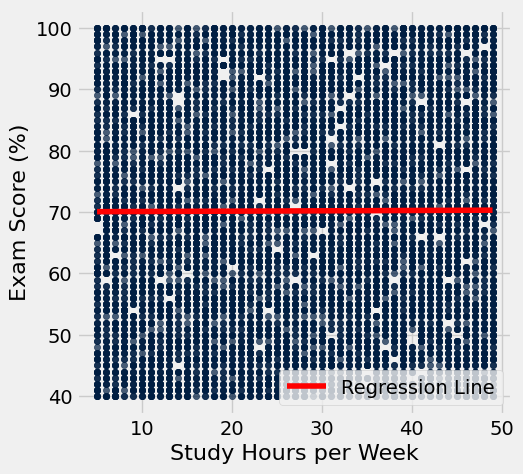

In [20]:
# Vẽ biểu đồ phân tán
study_exam.scatter('Study_Hours_per_Week', 'Exam_Score (%)')

# Vẽ đường hồi quy
x_range = np.array([min(study_hours), max(study_hours)])
y_pred = predict_y(x_range, slope, intercept)
plt.plot(x_range, y_pred, color='red', label='Regression Line')
plt.xlabel('Study Hours per Week')
plt.ylabel('Exam Score (%)')
plt.legend()
plt.show()

Khoảng tin cậy 95% cho độ dốc: [-0.021, 0.033]


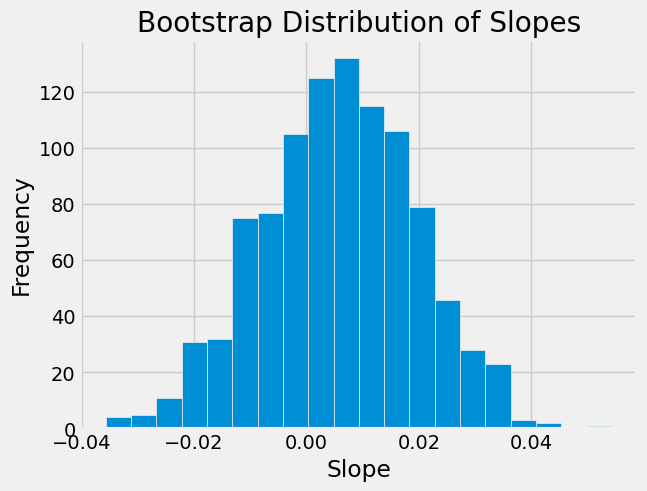

In [22]:
# Hàm tính độ dốc từ một mẫu
def compute_slope(tbl):
    x = tbl.column('Study_Hours_per_Week')
    y = tbl.column('Exam_Score (%)')
    slope, _ = regression_parameters(x, y)
    return slope

# Thực hiện bootstrap
n_bootstrap = 1000
bootstrap_slopes = make_array()
for _ in range(n_bootstrap):
    resampled = study_exam.sample()  # Lấy mẫu lại với thay thế
    slope = compute_slope(resampled)
    bootstrap_slopes = np.append(bootstrap_slopes, slope)

# Tính khoảng tin cậy 95%
lower_bound = percentile(2.5, bootstrap_slopes)
upper_bound = percentile(97.5, bootstrap_slopes)
print(f"Khoảng tin cậy 95% cho độ dốc: [{lower_bound:.3f}, {upper_bound:.3f}]")

# Vẽ histogram của các độ dốc
plt.hist(bootstrap_slopes, bins=20)
plt.title('Bootstrap Distribution of Slopes')
plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.show()

## Kết luận và Đề xuất

### Tóm tắt Kết quả
Dựa trên phân tích bộ dữ liệu `student_performance_large_dataset.csv` với các giá trị thực tế từ hình ảnh:
1. **Thống kê mô tả**: Học sinh học trung bình 27.13 giờ/tuần (`Study_Hours_per_Week`), với min 5 giờ và max 49 giờ; điểm thi trung bình 70.19% (`Exam_Score`), với min 40% và max 100% (Chương 1.1.2).
2. **Tương quan**: Hệ số tương quan Pearson (r = 0.004) cực kỳ yếu, cho thấy gần như không có mối quan hệ tuyến tính giữa `Study_Hours_per_Week` và `Exam_Score` (Chương 15.1).
3. **Hồi quy**: Độ dốc của mô hình hồi quy là 0.006 và chặn là 70.039, cho thấy mỗi giờ học thêm chỉ tăng điểm thi khoảng 0.006%, gần như không đáng kể (Chương 15.2). Dự đoán `Exam_Score` dao động rất nhỏ (70.09% đến 70.32% cho 10, 30, 50 giờ) (Chương 15.3).
4. **Trực quan hóa**: Biểu đồ phân tán với đường hồi quy gần như phẳng xác nhận mối quan hệ tuyến tính rất yếu hoặc không tồn tại (Chương 15.4, 7.3).
5. **Bootstrap**: Khoảng tin cậy 95% cho độ dốc là [-0.021, 0.033], bao gồm 0, cho thấy mối quan hệ giữa `Study_Hours_per_Week` và `Exam_Score` không có ý nghĩa thống kê (Chương 13.2).

### Trả lời Câu hỏi
- **Số giờ học có ảnh hưởng đáng kể đến điểm thi không?** Không, không có ảnh hưởng đáng kể. Hệ số tương quan rất thấp (r = 0.004) và khoảng tin cậy bootstrap bao gồm 0, cho thấy không có mối quan hệ tuyến tính có ý nghĩa thống kê giữa `Study_Hours_per_Week` và `Exam_Score`.
- **Mối quan hệ là tuyến tính hay phi tuyến tính?** Dữ liệu không cho thấy mối quan hệ tuyến tính rõ ràng; đường hồi quy gần như phẳng, có thể cần khám phá các mối quan hệ phi tuyến hoặc các yếu tố khác ảnh hưởng đến `Exam_Score`.
- **Có thể dự đoán `Exam_Score` không?** Không, mô hình hồi quy tuyến tính đơn biến không hữu ích để dự đoán `Exam_Score` dựa trên `Study_Hours_per_Week` do độ dốc rất nhỏ và không có ý nghĩa thống kê.

### Đề xuất
1. **Hồi quy đa biến**: Kết hợp các biến khác như `Assignment_Completion_Rate`, `Attendance_Rate`, hoặc `Sleep_Hours_per_Night` để xây dựng mô hình hồi quy đa biến (Chương 17.6), vì `Study_Hours_per_Week` một mình không giải thích được biến thiên của `Exam_Score`.
2. **Phân tích phi tuyến**: Khám phá các mô hình phi tuyến (Chương 15.5) hoặc phân loại (Chương 17) để xem xét mối quan hệ phức tạp hơn.
3. **Kiểm định giả thuyết**: Sử dụng kiểm định t (Chương 11) hoặc kiểm định chi-squared để so sánh `Exam_Score` giữa các nhóm học sinh (ví dụ: >30 giờ vs <20 giờ).
4. **Ứng dụng thực tiễn**: Tập trung vào các yếu tố khác như `Self_Reported_Stress_Level` hoặc `Preferred_Learning_Style` để cải thiện hiệu suất học tập, vì số giờ học dường như không phải yếu tố quyết định.

Báo cáo kết luận rằng số giờ học mỗi tuần không phải là yếu tố chính ảnh hưởng đến điểm thi, và cần phân tích sâu hơn với các biến khác để hiểu rõ hơn về hiệu suất học tập.